# L'évolution de la population scolaire et de la population totale à Paris entre 2019 et 2021, par arrondissement 
### Problématique : Est-ce que l'évolution de la démographie des écoles est en accord avec évolution de la population (par classe d'âge) ?

Claire du Campe de Rosamel, Benoît Nallet, Amandine Perret

## 1. Introduction



Avant de commencer l'analyse on aura besoin des packages suivants : 

In [2]:
!pip install unidecode
!pip install py7zr geopandas openpyxl tqdm s3fs 
!pip install PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette
!pip install urllib3==1.26.5
!pip install prettytable

  Cloning https://github.com/inseefrlab/cartiflette to /tmp/pip-req-build-1bk22sw0
  Running command git clone --filter=blob:none --quiet https://github.com/inseefrlab/cartiflette /tmp/pip-req-build-1bk22sw0
  Resolved https://github.com/inseefrlab/cartiflette to commit f6b0c5d049bd6dcae7b437bd931957371da24278
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
import pandas as pd
import zipfile
import requests
import os
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from unidecode import unidecode 
import matplotlib.ticker as mticker
import geopandas as gpd
from cartiflette import carti_download

This is an experimental version of cartiflette published on PyPi.
To use the latest stable version, you can install it directly from GitHub with the following command:
pip install git+https://github.com/inseeFrLab/cartiflette.git


Quelques définitions :
Les unités statistiques de notre étude sont :

- la population en logement ordinaire et en résidence principale,
- la population scolaire en école primaire (maternelle et élémentaire).

Il est possible qu'un élève soit scolarisé dans un autre arrondissement que celui où il réside. Il faudra donc distinguer la populaire scolaire dénombrée au niveau de son lieu de résidence principale de celle dénombrée au niveau de son lieu de scolarisation.

Le champ de l'étude est restreint à la ville de Paris pour les années 2019 à 2021.

## 2. Collecte et nettoyage des données 

Notre analyse se fait à partir des plusieurs bases de données publique issues de la Statistique publique et disponible directement sur le site internet de l'Insee.
 
Les effectifs scolaires sont disponibles à l'url XX recensant pour toute la France le nombre d'élèves par classe et par école. Nous avons donc réduit l'étendue de la base de données aux seules écoles dans Paris intra-muros (dont le code postal commence par 75). 

Une deuxième partie des données est issue du recensement fait par l'Insee. Plusieurs bases de données ont été nécessaires : la base logement pour comptabiliser la population habitant effectivement dans chaque arrondissement.

Enfin la base XY renseigne les effectifs de population par tranche d'âge.

Les différentes bases de données sont importées directement depuis leur adresse internet et sont ensuite nettoyées dans le script "import_data.py" ci-dessous.

In [4]:
from scripts import import_data

<Response [200]>
Téléchargement réussi !
<Response [200]>
Téléchargement réussi !
<Response [200]>
Téléchargement réussi !
Le fichier BTT_TD_POP1B_2019.zip existe déjà.
Fichiers extraits.


/home/onyxia/work/Projet-Python-evolution-des-ecoles-par-arrondissement-dans-Paris-entre-2019-et-2022/scripts/import_data.py:128: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ages_2019 = pd.read_csv(file_to_read, delimiter=';', encoding='latin1')


Le fichier BTT_TD_POP1B_2020.zip existe déjà.
Fichiers extraits.


/home/onyxia/work/Projet-Python-evolution-des-ecoles-par-arrondissement-dans-Paris-entre-2019-et-2022/scripts/import_data.py:154: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ages_2020 = pd.read_csv('extracted_files/TD_POP1B_2020.csv', delimiter=';', encoding='latin1')


Le fichier TD_POP1B_2021.zip existe déjà.
Fichiers extraits.


/home/onyxia/work/Projet-Python-evolution-des-ecoles-par-arrondissement-dans-Paris-entre-2019-et-2022/scripts/import_data.py:182: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ages_2021 = pd.read_csv('extracted_files/TD_POP1B_2021.csv', delimiter=';', encoding='latin1')


## 3. Quels constats /!\ A la fin il faudra enlever les print du script

Depuis la crise sanitaire la ville de Paris a perdu des habitants dans un contexte de vieillissement de la population.

Ces pertes sont concentrées dans le Nord-Est parisien et on retrouve la même géographie de perte pour la population par arrondissement de scolarisation.

Pourtant les fermetures de classes/d'écoles se sont concentrées dans XXXZZZ.


/home/onyxia/work/Projet-Python-evolution-des-ecoles-par-arrondissement-dans-Paris-entre-2019-et-2022/scripts/stats_descr_recensement.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_2021_paris["ANNEE"] = 2021
/home/onyxia/work/Projet-Python-evolution-des-ecoles-par-arrondissement-dans-Paris-entre-2019-et-2022/scripts/stats_descr_recensement.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_2020_paris["ANNEE"] = 2020
/home/onyxia/work/Projet-Python-evolution-des-ecoles-par-arrondissement-dans

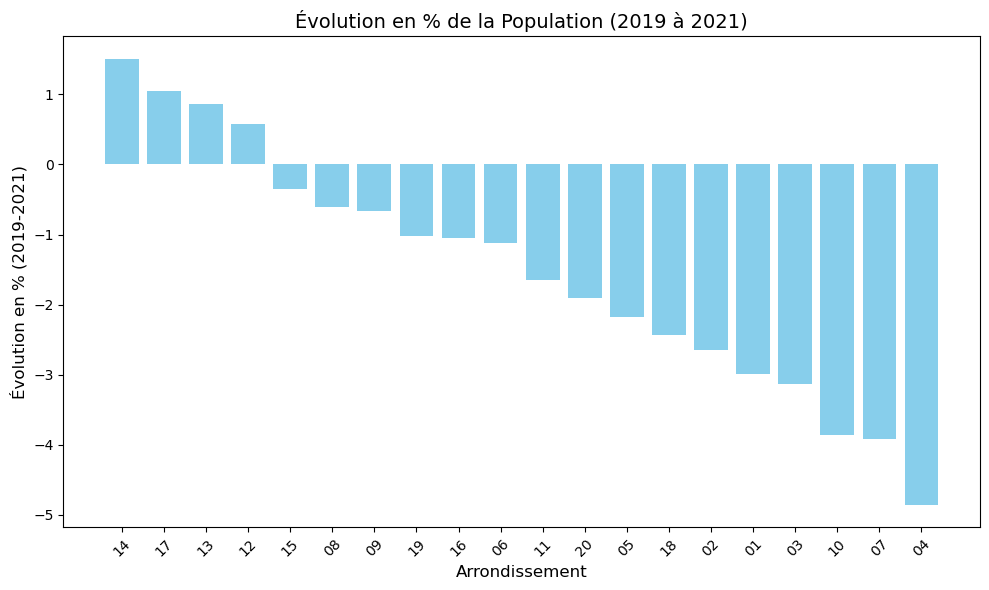

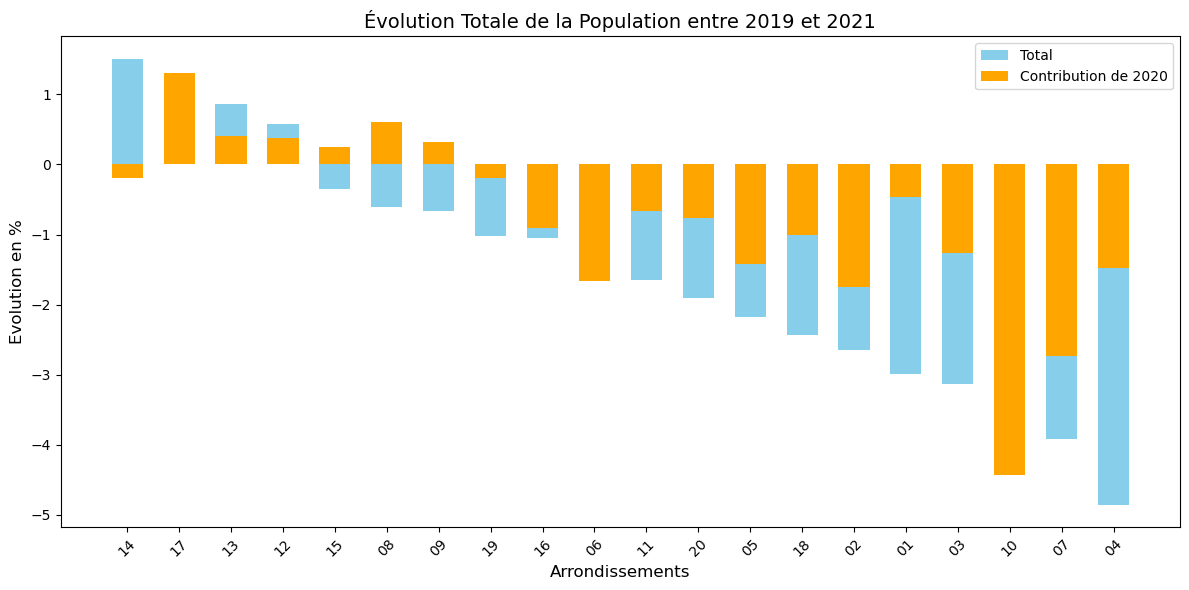

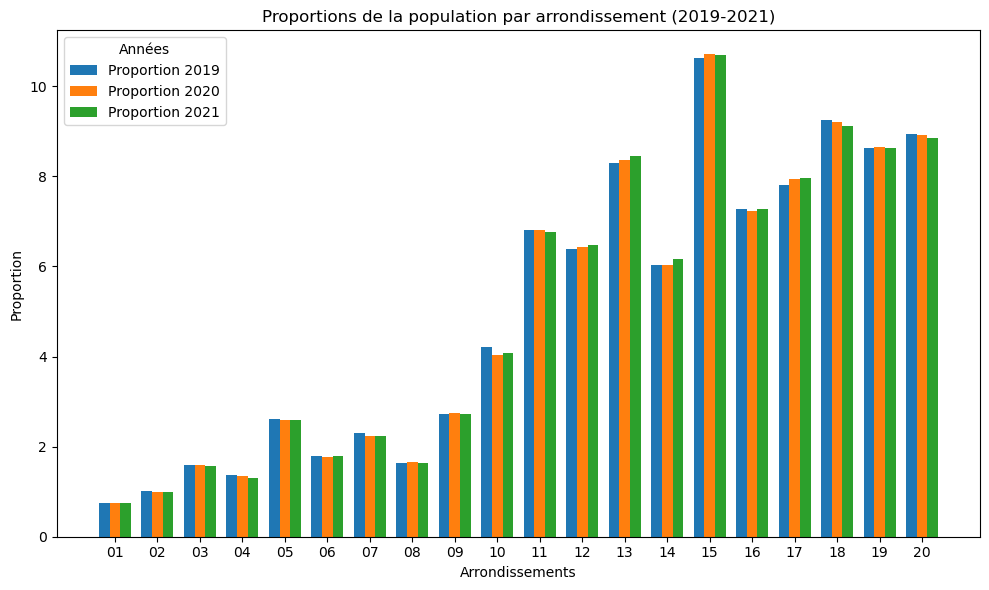

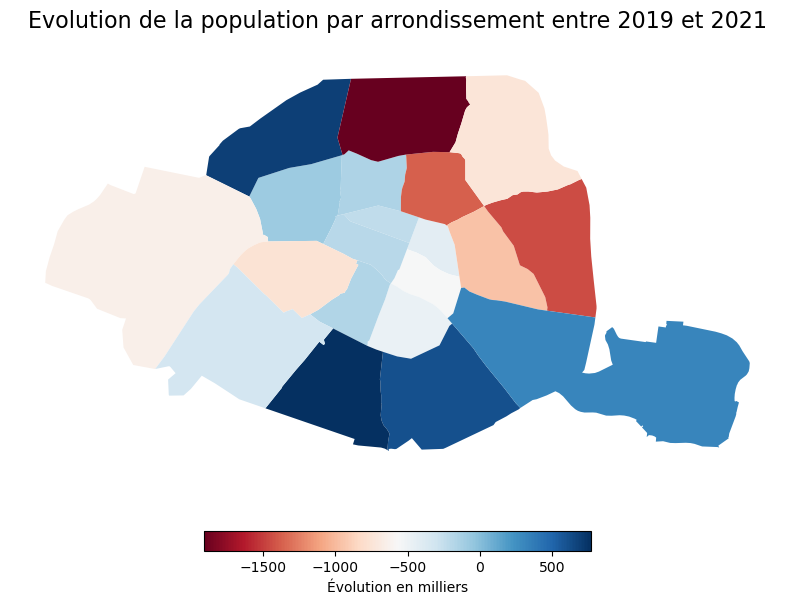

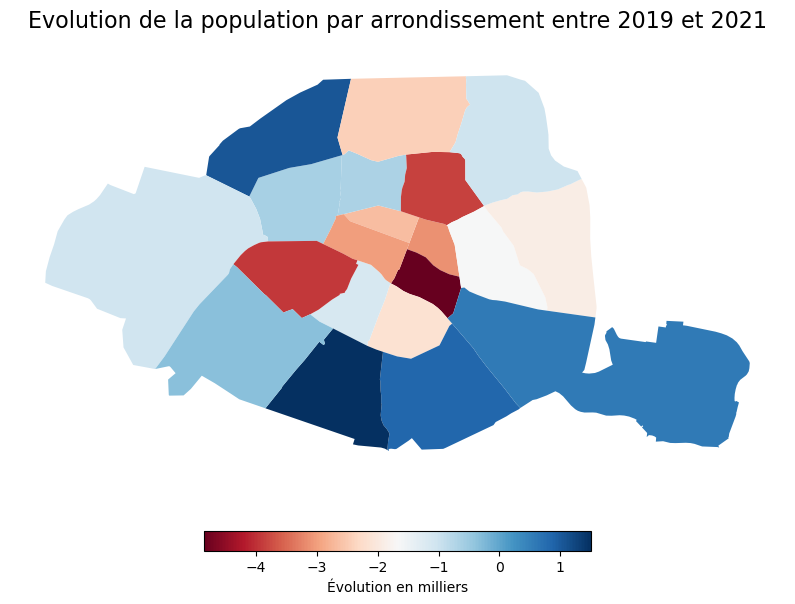

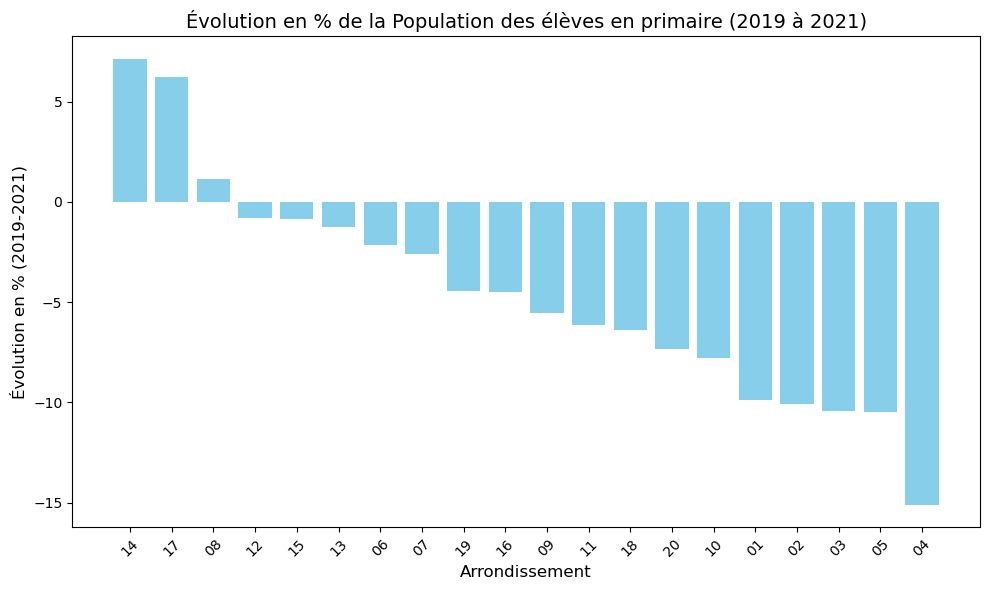

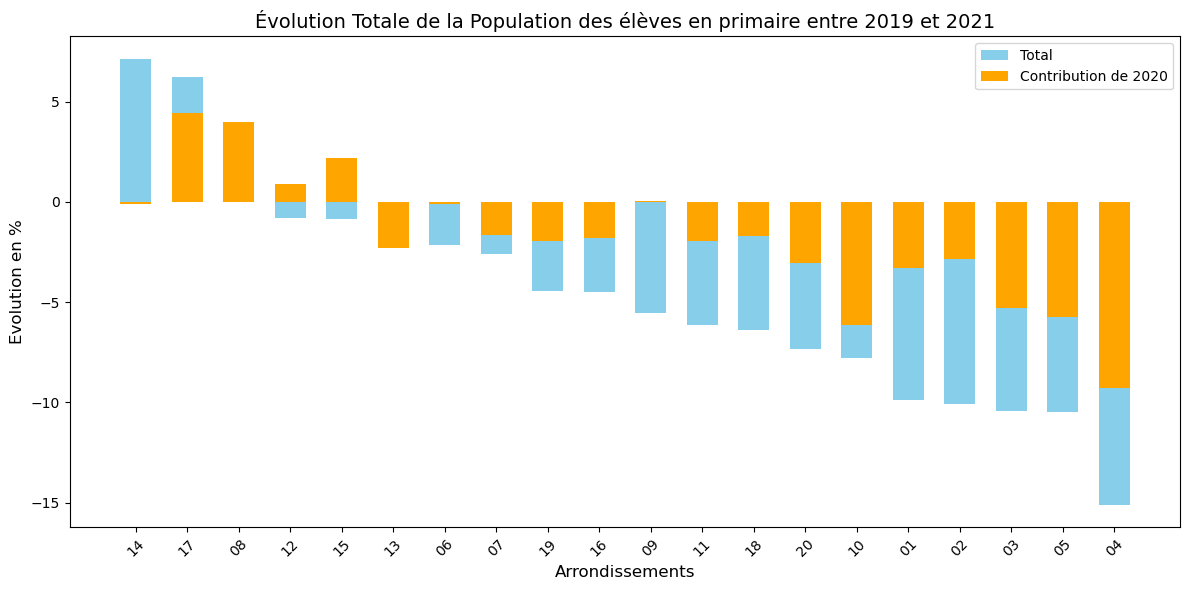

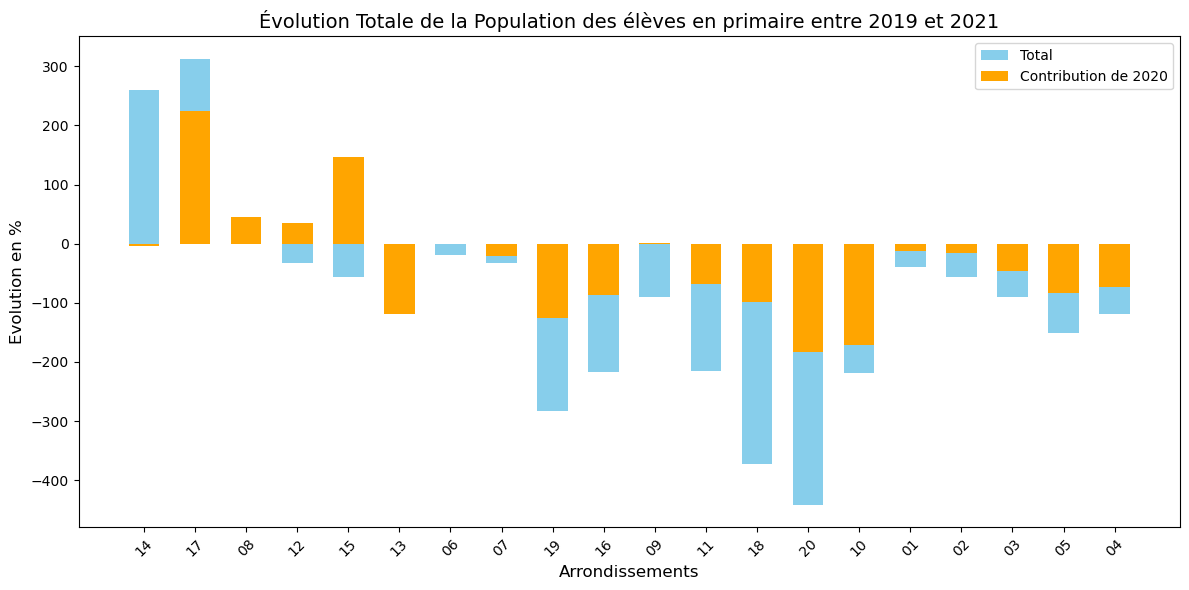

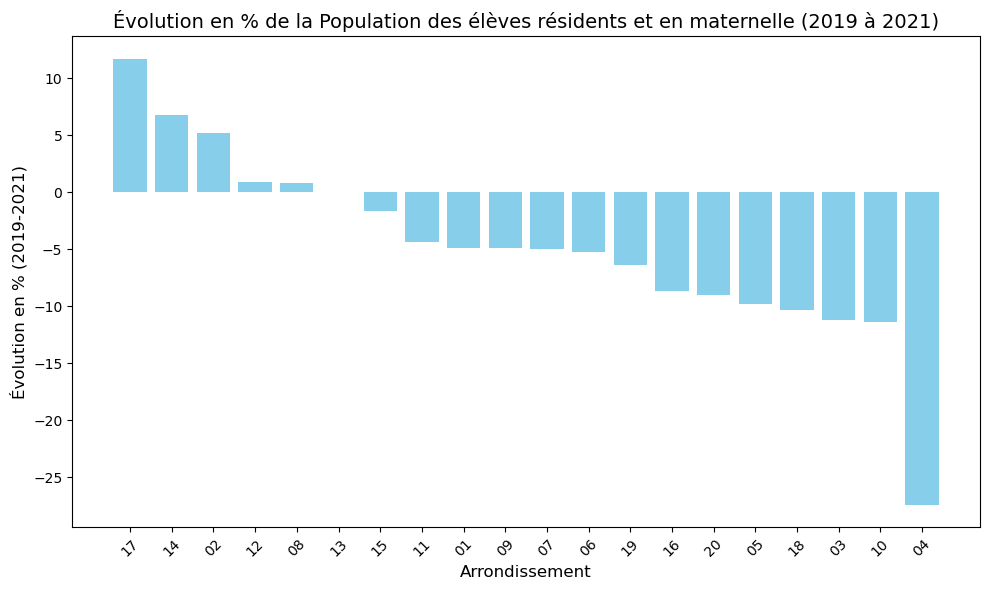

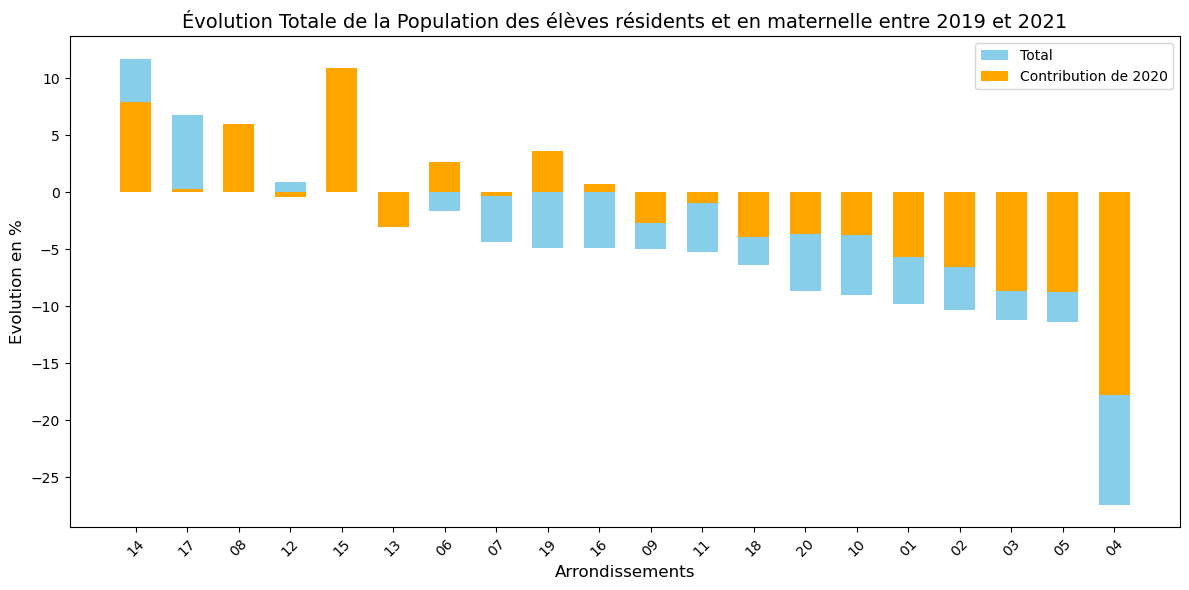

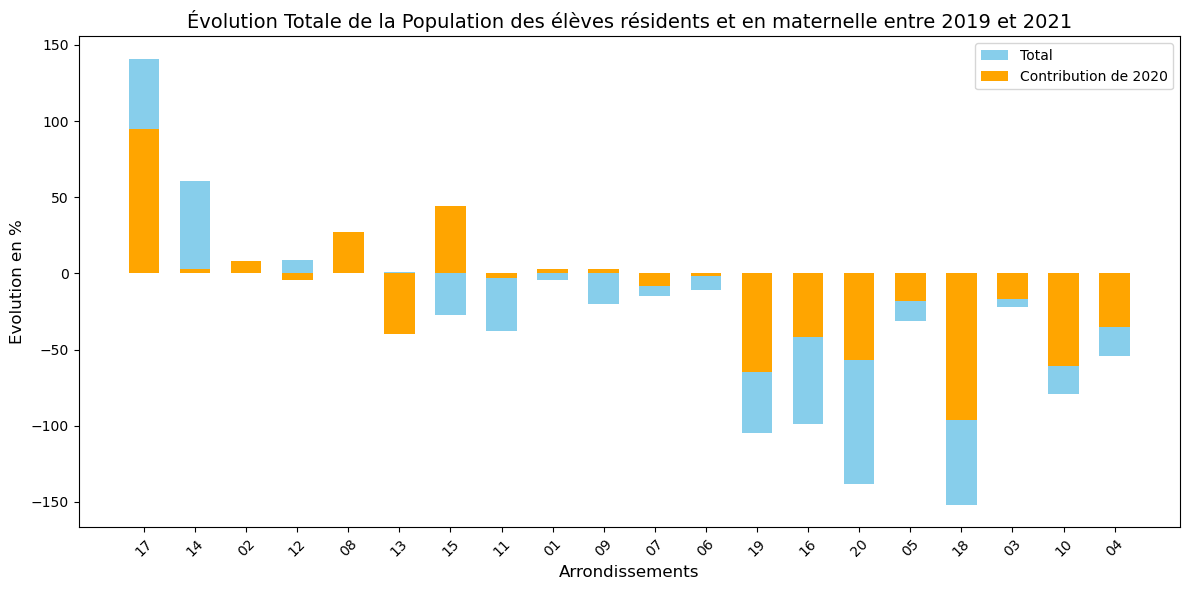

In [5]:
from scripts import stats_descr_recensement

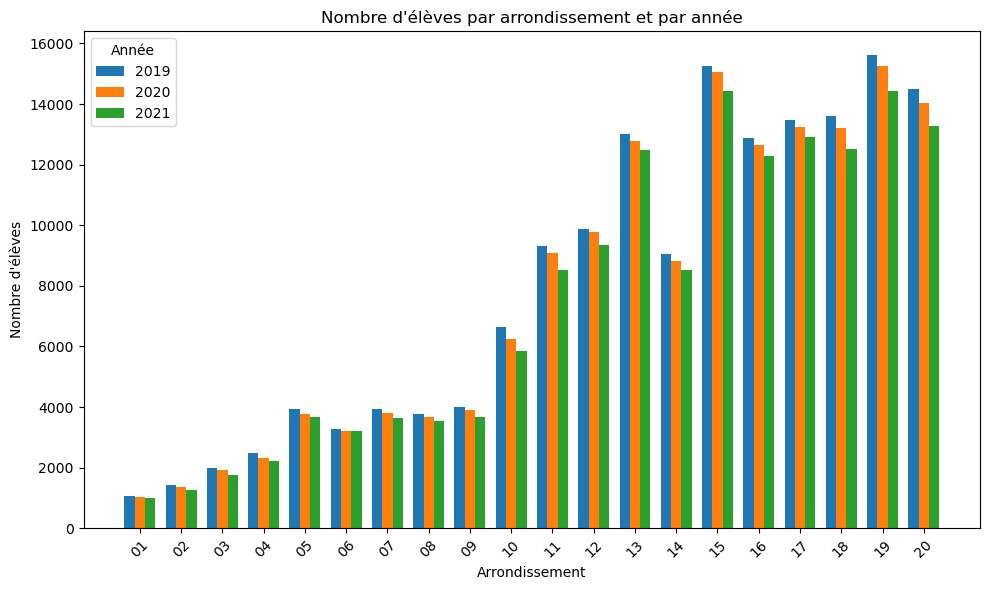

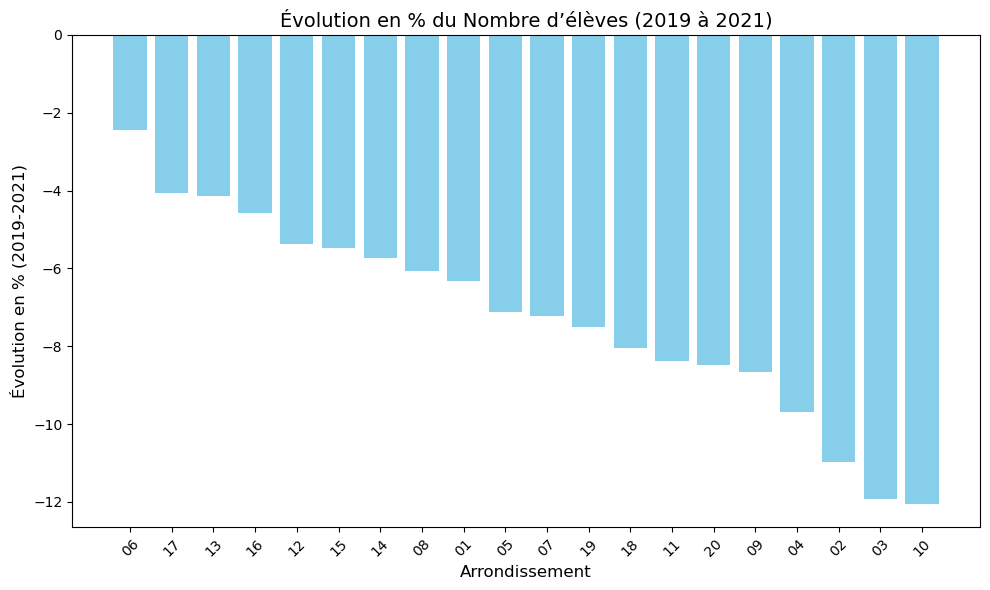

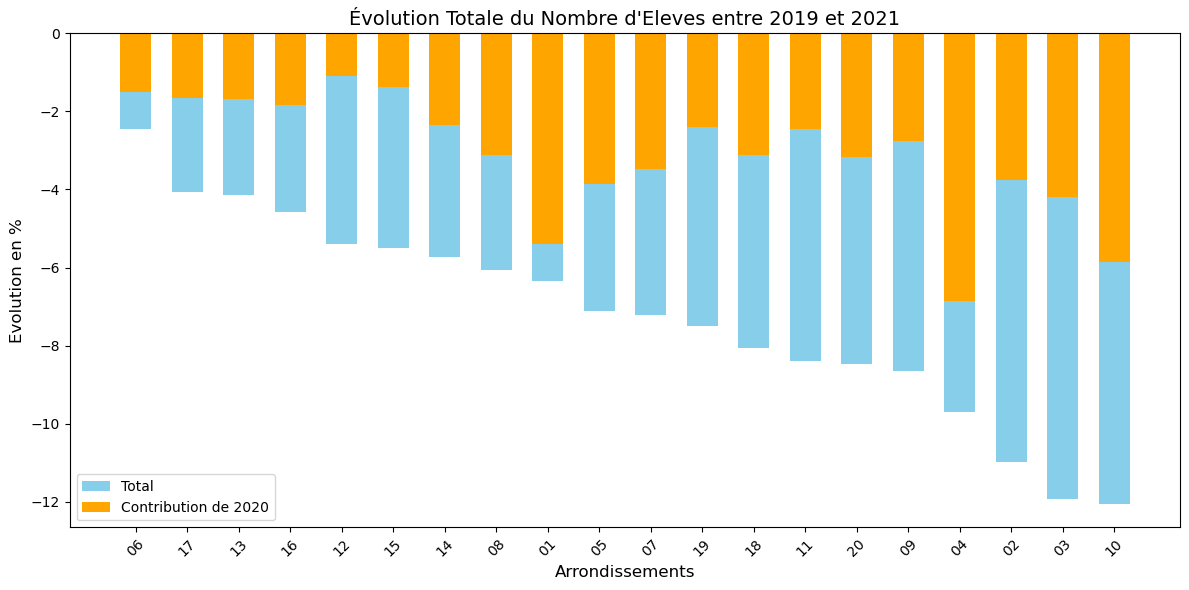

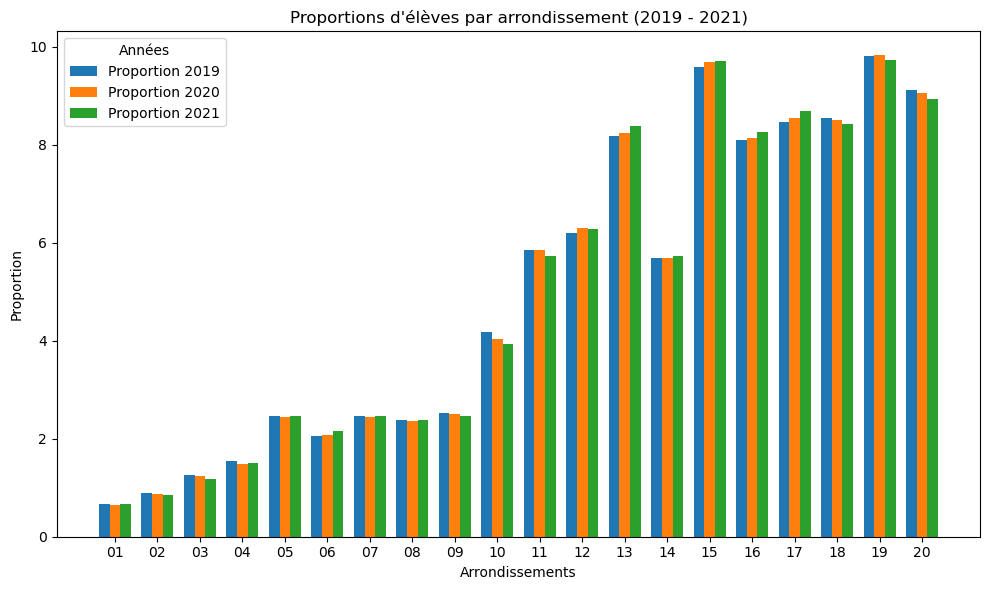

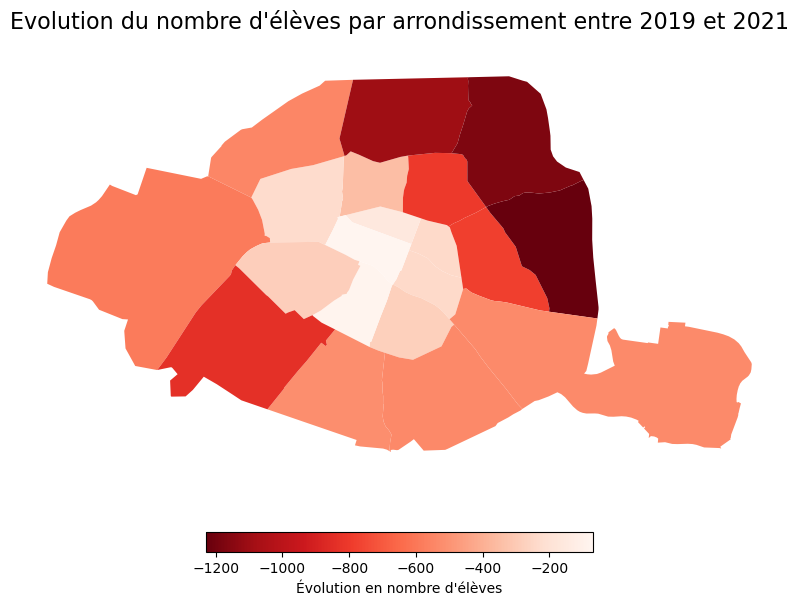

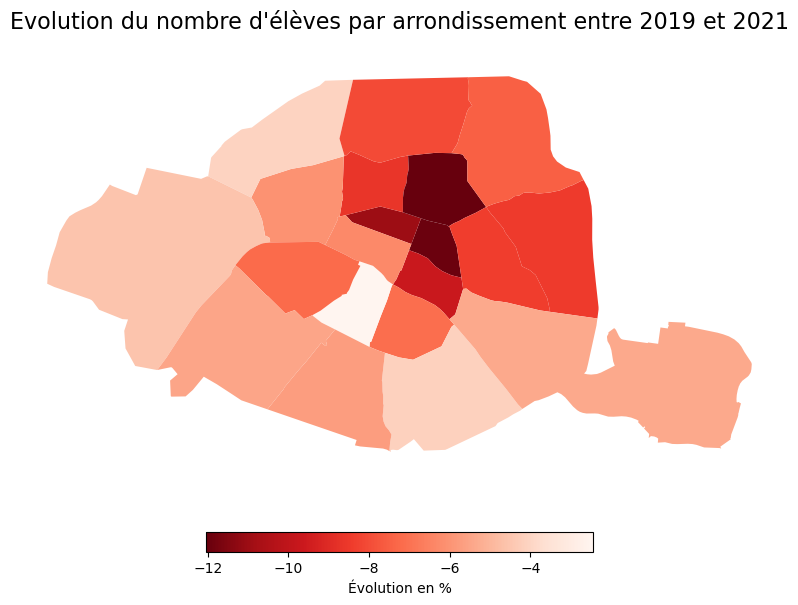

In [6]:
from scripts import stats_descr_effectif ;

### A. L'évolution de la population à Paris par arrondissement entre 2019 et 2021
#### a. L'évolution globale 

In [7]:
print("Tableau de l'évolution globale de la population en résidence principale parisienne")
print(stats_descr_recensement.pop_totale)

Tableau de l'évolution globale de la population en résidence principale parisienne
   ANNEE  Nombre d'habitants en logement ordinaire  Evolution en niveau  \
0   2019                                    849778                  0.0   
1   2020                                    845744              -4034.0   
2   2021                                    841696              -4048.0   

   Evolution en %  
0        0.000000  
1       -0.474712  
2       -0.478632  


attention légende fausse


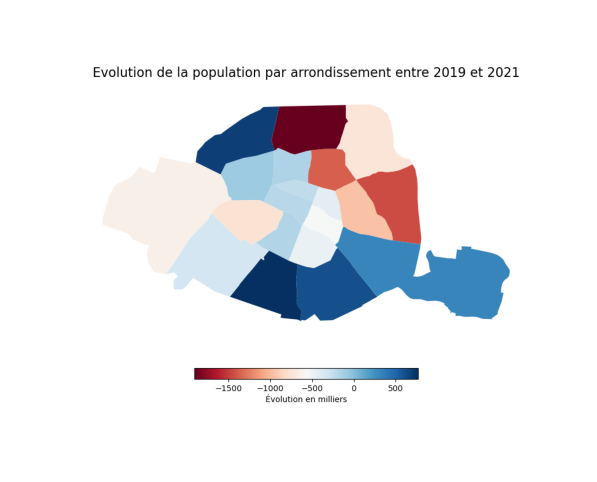

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread("graphs/carte_evol_population_niveau.png"))
plt.axis("off")
print("attention légende fausse")

attention légende fausse


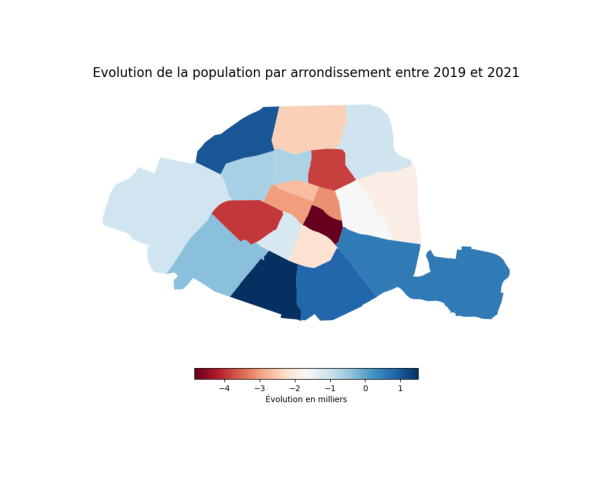

In [9]:
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread("graphs/carte_evol_population_pourcentage.png"))
plt.axis("off")
print("attention légende fausse")


#### b. Focus sur la pyramide des âges 



attention légende fausse


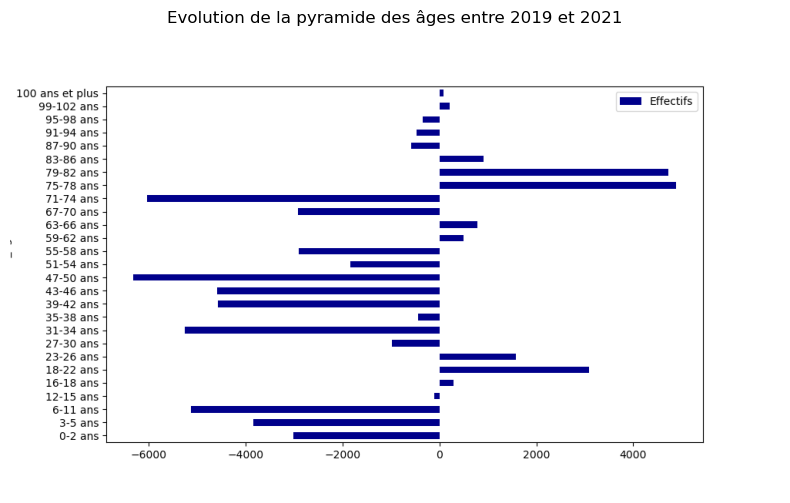

In [10]:
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread("graphs/Pyramide_Paris_ecart1921.png"))
plt.title("Evolution de la pyramide des âges entre 2019 et 2021")
plt.axis("off")
print("attention légende fausse")

### B. L'évolution des effectifs scolaires par arrondissement entre 2019 et 2021
#### a. Au global 


In [11]:
print("Tableau de la baisse du nombre d'élèves")
print(stats_descr_effectif.table_pertes_df)

Tableau de la baisse du nombre d'élèves
     Période  Perte absolue  Part relative (%)
0  2019-2020           4014          37.996971
1  2020-2021           6550          62.003029
2  2019-2021          10564         100.000000


(np.float64(-0.5), np.float64(999.5), np.float64(799.5), np.float64(-0.5))

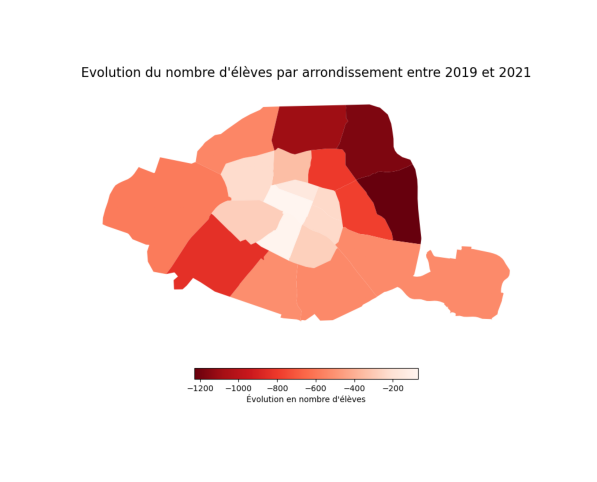

In [12]:
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread("graphs/carte_evol_effectifs_niveau.png"))
plt.axis("off")

ca serait utile de mettre le chiffre associé à la borne de droite de la légende


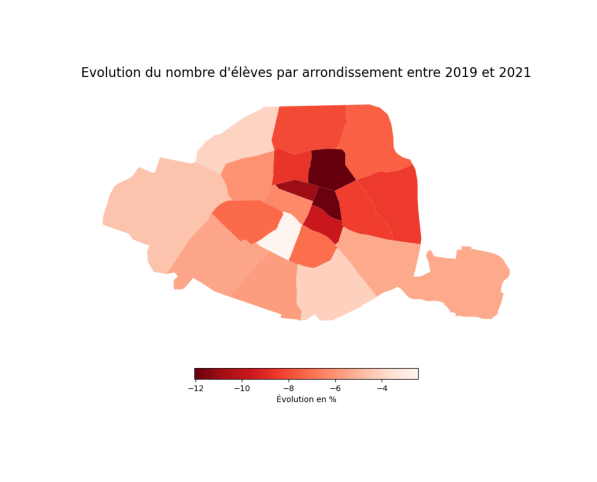

In [13]:
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread("graphs/carte_evol_effectifs_pourcentage.png"))
plt.axis("off")
print("ca serait utile de mettre le chiffre associé à la borne de droite de la légende")


#### b. La population en primaire

#### c. La population en maternelle 

In [29]:
%matplotlib inline
from scripts import stats_descr_recensement

In [30]:
from scripts import stats_ages

/home/onyxia/work/Projet-Python-evolution-des-ecoles-par-arrondissement-dans-Paris-entre-2019-et-2022/scripts/stats_ages.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ages_2021 = pd.read_csv('extracted_files/TD_POP1B_2021.csv', delimiter=';', encoding='latin1')
/home/onyxia/work/Projet-Python-evolution-des-ecoles-par-arrondissement-dans-Paris-entre-2019-et-2022/scripts/stats_ages.py:13: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ages_2020 = pd.read_csv('extracted_files/TD_POP1B_2020.csv', delimiter=';', encoding='latin1')


KeyboardInterrupt: 

`Pour l'instant mes cellules tournent, les scripts fonctionnent et on peut normalement récupérer les graphiques et des bases de données comme dans les exemples plus haut`

%matplotlib inline permet que quand le script est importé, tous les graphiques ne s'affichent pas

## 4. Modelisation 

Ici les regressions d'Amandine 

## 5. Conclusion
